# Project Stage - II (Data Modeling and Hypothesis Testing)

## Goals
The goal of Stage II is to develop formal hypothesis for the intuitions we had in stage I and utilize statistical modeling to prove/ disprove them.

## Tasks:

#### Task 1

##### Member Task
* Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.
* Compare the data against other states. (normalize by population)
* Identify counties within the previous state with high case and death rates. (normalize by population)
* Plot daily trends (new cases and deaths) of state and top 5 infected counties. Utilize aggregrate, normalized by population, and log normalized values.

<br/><hr/>

# Import modules

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Markdown as md
from IPython.display import Image

# Import Super Dataset

In [2]:
super_dataset = pd.read_csv("../../../../data/stage_I/superDataset.csv")
super_dataset.head()

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-22_deaths,2020-01-23_cases,2020-01-23_deaths,2020-01-24_cases,...,2021-03-13_cases,2021-03-13_deaths,2021-03-14_cases,2021-03-14_deaths,2021-03-15_cases,2021-03-15_deaths,2021-03-16_cases,2021-03-16_deaths,2021-03-17_cases,2021-03-17_deaths
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,55869,0,0,0,0,0,...,6416,95,6426,95,6471,95,6474,95,6483,96
2,1003,Baldwin County,AL,1,223234,0,0,0,0,0,...,20091,294,20103,294,20210,294,20227,294,20263,295
3,1005,Barbour County,AL,1,24686,0,0,0,0,0,...,2181,53,2184,53,2195,53,2198,53,2199,54
4,1007,Bibb County,AL,1,22394,0,0,0,0,0,...,2479,60,2481,60,2499,60,2508,60,2512,60


# Select State

In [3]:
my_state = "MA"
md("# Pull {0} data from Super Dataset".format(my_state))

# Pull MA data from Super Dataset

In [4]:
state_data = super_dataset[super_dataset.State == my_state]
state_data.head()

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-22_deaths,2020-01-23_cases,2020-01-23_deaths,2020-01-24_cases,...,2021-03-13_cases,2021-03-13_deaths,2021-03-14_cases,2021-03-14_deaths,2021-03-15_cases,2021-03-15_deaths,2021-03-16_cases,2021-03-16_deaths,2021-03-17_cases,2021-03-17_deaths
1237,0,Statewide Unallocated,MA,25,0,0,0,0,0,0,...,1449,8,4444,73,1449,8,1449,8,1449,9
1238,25001,Barnstable County,MA,25,212990,0,0,0,0,0,...,10558,421,10558,421,10764,424,10810,424,10872,424
1239,25003,Berkshire County,MA,25,124944,0,0,0,0,0,...,4946,264,4946,264,4998,266,5012,267,5040,267
1240,25005,Bristol County,MA,25,565217,0,0,0,0,0,...,56939,1566,56939,1566,57253,1578,57318,1580,57489,1582
1241,25007,Dukes County,MA,25,17332,0,0,0,0,0,...,879,0,879,0,882,0,883,0,884,0


In [5]:
md("# Seperate cases and deaths from {0} Dataset\n{0} dataframe contains deaths and cases together.To perform mathematical and statistical operations on cases and deaths in the later sections, I seperated deaths and cases into two different dataframes.".format(my_state))

# Seperate cases and deaths from MA Dataset
MA dataframe contains deaths and cases together.To perform mathematical and statistical operations on cases and deaths in the later sections, I seperated deaths and cases into two different dataframes.

In [6]:
state_cases = state_data.drop([i for i in state_data.columns if "deaths" in i], axis=1)
state_cases.columns = [i.replace("_cases", "") for i in state_cases.columns]
state_cases.head()

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,...,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17
1237,0,Statewide Unallocated,MA,25,0,0,0,0,0,0,...,1456,1460,1459,1644,1449,1449,4444,1449,1449,1449
1238,25001,Barnstable County,MA,25,212990,0,0,0,0,0,...,10360,10393,10452,10504,10558,10558,10558,10764,10810,10872
1239,25003,Berkshire County,MA,25,124944,0,0,0,0,0,...,4907,4915,4921,4938,4946,4946,4946,4998,5012,5040
1240,25005,Bristol County,MA,25,565217,0,0,0,0,0,...,56481,56575,56686,56816,56939,56939,56939,57253,57318,57489
1241,25007,Dukes County,MA,25,17332,0,0,0,0,0,...,877,877,879,879,879,879,879,882,883,884


In [7]:
state_deaths = state_data.drop([i for i in state_data.columns if "cases" in i], axis=1)
state_deaths.columns = [i.replace("_deaths", "") for i in state_deaths.columns]
state_deaths.head()

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,...,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17
1237,0,Statewide Unallocated,MA,25,0,0,0,0,0,0,...,8,8,8,13,8,8,73,8,8,9
1238,25001,Barnstable County,MA,25,212990,0,0,0,0,0,...,415,418,418,418,421,421,421,424,424,424
1239,25003,Berkshire County,MA,25,124944,0,0,0,0,0,...,263,263,263,264,264,264,264,266,267,267
1240,25005,Bristol County,MA,25,565217,0,0,0,0,0,...,1545,1550,1556,1562,1566,1566,1566,1578,1580,1582
1241,25007,Dukes County,MA,25,17332,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
md("""
<div class="alert-success">
    <h2 style="text-align:center;"><br/><strong>Generate Weekly Statistics for new cases and deaths across {0}</strong><br/><br/></h2>
</div>
""".format(my_state))


<div class="alert-success">
    <h2 style="text-align:center;"><br/><strong>Generate Weekly Statistics for new cases and deaths across MA</strong><br/><br/></h2>
</div>


To generate weekly statistics across the state, we would first want to perform the following steps:
1. Get the sum of new cases and deaths across the entire state in a day.
2. Given a date, extract year and week number to group them later.
3. Group data by year and week and find the mean and median for every week.

In [9]:
md("### Find total 'new' cases across {0} for each day".format(my_state))

### Find total 'new' cases across MA for each day

In [10]:
# Slice dataframe, take columns from index 5 to the end (they are the date columns)
# Find the sum (this gives the total number of cases per day)
total_state_cases = pd.DataFrame(state_cases.iloc[:, 5:].sum(), columns=['total'])
# Find difference between rows to get the number of new cases per day
temp = total_state_cases.diff()
# Replace first row of difference dataframe with first row of initial dataframe, to preserve the first values
temp.iloc[0] = total_state_cases.iloc[0]
total_state_cases = temp
del temp

In [11]:
md("### Find total 'new' deaths across {0} for each day".format(my_state))

### Find total 'new' deaths across MA for each day

In [12]:
# Slice dataframe, take columns from index 5 to the end (they are the date columns)
# Find the sum (this gives the total number of cases per day)
total_state_deaths = pd.DataFrame(state_deaths.iloc[:, 5:].sum(), columns=['total'])
# Find difference between rows to get the number of new cases per day
temp = total_state_deaths.diff()
# Replace first row of difference dataframe with first row of initial dataframe, to preserve the first values
temp.iloc[0] = total_state_deaths.iloc[0]
total_state_deaths = temp
del temp

### Extract year and week from date and add new columns

In [13]:
total_state_cases['date'] = total_state_cases.index
total_state_cases[["year", "week", "day"]] = pd.DataFrame(total_state_cases.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=total_state_cases.index)
total_state_cases.drop(['date', 'day'], axis=1, inplace=True)

total_state_deaths['date'] = total_state_deaths.index
total_state_deaths[["year", "week", "day"]] = pd.DataFrame(total_state_deaths.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=total_state_deaths.index)
total_state_deaths.drop(['date', 'day'], axis=1, inplace=True)

In [14]:
total_state_cases.tail()

,total,year,week
2021-03-13,0.0,2021,10
2021-03-14,2995.0,2021,10
2021-03-15,1105.0,2021,11
2021-03-16,1022.0,2021,11
2021-03-17,1689.0,2021,11


In [15]:
total_state_deaths.tail()

,total,year,week
2021-03-13,0.0,2021,10
2021-03-14,65.0,2021,10
2021-03-15,28.0,2021,11
2021-03-16,16.0,2021,11
2021-03-17,43.0,2021,11


### Group data by week and find mean, median and mode

In [16]:
grouped_data = total_state_cases.groupby(['year', 'week'])
total_new_cases = grouped_data.sum()
mean_new_cases = grouped_data.mean()
median_new_cases = grouped_data.median()

grouped_data = total_state_deaths.groupby(['year', 'week'])
total_new_deaths = grouped_data.sum()
mean_new_deaths = grouped_data.mean()
median_new_deaths = grouped_data.median()

Mode represents the value with highest frequency. For the covid cases and deaths, it is very unlikely that we see same number between the 7 days of the week.

Its highly probable that we will end up having 7 different values with a frequency of 1 in most of the weeks. So, finding mode will not serve any significant purpose in our case.

### Concatenate all the values in a single dataframe

In [17]:
weekly_cases = pd.concat([total_new_cases, mean_new_cases, median_new_cases, total_new_deaths, mean_new_deaths, median_new_deaths], axis=1)
weekly_cases.columns = ['Total New Cases', 'Mean New Cases', 'Median New Cases', 'Total New Deaths', 'Mean New Deaths', 'Median New Deaths']
weekly_cases = weekly_cases.reset_index()
weekly_cases = weekly_cases.astype('int')
weekly_cases

,year,week,Total New Cases,Mean New Cases,Median New Cases,Total New Deaths,Mean New Deaths,Median New Deaths
0,2020,4,0,0,0,0,0,0
1,2020,5,1,0,0,0,0,0
2,2020,6,0,0,0,0,0,0
3,2020,7,0,0,0,0,0,0
4,2020,8,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
56,2021,7,10389,1484,1480,342,48,50
57,2021,8,10658,1522,1516,241,34,33
58,2021,9,7500,1071,1410,307,43,44
59,2021,10,10814,1544,1589,271,38,42


<div class="alert-success">
    <h2 style="text-align:center;"><br/><strong>Compare data against other states</strong><br/><br/></h2>
</div>

We can replicate the above steps for other states in the same way. So lets define a function that will return the final result.

### Multiplication Factor

To normalize the number of new cases and deaths across different states, we can divide the number by population and then multiply by the same constant factor for all states.

We can take any value as the **multiplication factor** but it makes much sense if we chose the value that is close to the maximum population among all states in the United State

In [18]:
super_dataset[['State','population', 'StateFIPS']].groupby('StateFIPS').sum().max()

population    39512223
dtype: int64

Since the highest population among all states of the United States is close to 40 million, lets normalize all values to : **40,000,000**

In [19]:
max_popn = 40000000

### Define function

In [20]:
from pandas.errors import EmptyDataError


def get_mean_norm(dataframe, of: str, popn: int):
    """
    Returns the weekly mean normalized to popn population
    
    Input Params:
    dataframe (pandas.core.frame.DataFrame): DataFrame to use to calculate weekly mean
    of (str): 'cases' or 'deaths' to represent the attribute the mean is calculated for
    
    Return Params:
    
    """
    dataframe.columns = [i.replace("_{0}".format(of), "") for i in dataframe.columns]
    # Find total cases across the entire state for each day
    total_cases = pd.DataFrame(dataframe.iloc[:, 4:].sum(), columns=['total'])
    new_cases = total_cases[1:].diff()
    new_cases.iloc[0] = total_cases.iloc[1]
    population = int(total_cases.iloc[0])
    # Extract year and week for each row
    new_cases['date'] = new_cases.index
    new_cases[["year", "week", "day"]] = pd.DataFrame(new_cases.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=new_cases.index)
    new_cases.drop(['date', 'day'], axis=1, inplace=True)
    mean_new_cases = new_cases.groupby(['year', 'week']).mean()
    # Apply normalization (divide each row by population and multiply by 100,000)
    mean_new_cases = mean_new_cases.apply(lambda x: x/population*popn).round().astype('int')
    return mean_new_cases
    
    

def weekly_mean(dataset, state:str, max_popn: int, cases:bool=True, deaths:bool=True):
    state_data = dataset[dataset.State == state]
    # Remove rows with unallocated cases and deaths
    state_data = state_data[state_data.population != 0]
    if state_data.empty:
        raise EmptyDataError("No data found with the state name '{0}'".format(state))
    else:
        if cases:
            state_cases = state_data[[i for i in state_data.columns if "deaths" not in i]]
            mean_new_cases = get_mean_norm(state_cases, of='cases', popn=max_popn)
            mean_new_cases.columns = ['{0}_cases'.format(state)]
        else:
            mean_new_cases = None
        if deaths:
            state_deaths = state_data[[i for i in state_data.columns if "cases" not in i]]
            mean_new_deaths = get_mean_norm(state_deaths, of='deaths', popn=max_popn)
            mean_new_deaths.columns = ['{0}_deaths'.format(state)]
        else:
            mean_new_deaths = None
        weekly_data = pd.concat([mean_new_cases, mean_new_deaths], axis=1)
        weekly_data = weekly_data.reset_index()
        return weekly_data

### Choose 5 states

In [21]:
states = ['NY', 'MN', 'WY', 'WA', 'CA']

### Pull weekly mean data and concatenate

In [22]:
mean_data = []
for count, state in enumerate(states):
    if count != 0:
        temp = weekly_mean(super_dataset, state=state, max_popn=max_popn).drop(['year', 'week'], axis=1)
    else:
        temp = weekly_mean(super_dataset, state=state, max_popn=max_popn)
    mean_data.append(temp)
multi_states_data = pd.concat(mean_data, axis=1)
multi_states_data

,year,week,NY_cases,NY_deaths,MN_cases,MN_deaths,WY_cases,WY_deaths,WA_cases,WA_deaths,CA_cases,CA_deaths
0,2020,4,0,0,0,0,0,0,1,0,0,0
1,2020,5,0,0,0,0,0,0,0,0,0,0
2,2020,6,0,0,0,0,0,0,0,0,0,0
3,2020,7,0,0,0,0,0,0,0,0,0,0
4,2020,8,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021,7,14398,269,5535,57,6260,148,4303,110,6083,327
57,2021,8,15175,214,5578,53,5855,89,4468,101,4859,416
58,2021,9,14900,121,5523,66,3653,128,3591,66,3732,310
59,2021,10,13875,301,7450,199,3949,89,3642,65,2241,111


In [23]:
md("""
<div class="alert-success">
    <h2 style="text-align:center;"><br/><strong>Identify counties within {0} with high cases and death rates</strong><br/><br/></h2>
</div>
""".format(my_state))


<div class="alert-success">
    <h2 style="text-align:center;"><br/><strong>Identify counties within MA with high cases and death rates</strong><br/><br/></h2>
</div>


### Find maximum population

In [24]:
popn_max = state_data.population.max()
popn_max

1611699

In [25]:
max_popn = round(popn_max/10**int(len(str(popn_max))-2))*10**int(len(str(popn_max))-2)

In [26]:
md("Since the maximum population is **{0}**, we set the multiplication factor during normalization to: **{1}**".format(popn_max, max_popn))

Since the maximum population is **1611699**, we set the multiplication factor during normalization to: **1600000**

In [27]:
state_data = super_dataset[(super_dataset.State == my_state) & (super_dataset.population != 0)]
state_cases = state_data.drop([i for i in state_data.columns if "deaths" in i], axis=1)
state_cases.columns = [i.replace("_cases", "") for i in state_cases.columns]
state_cases.index = state_cases.countyFIPS
state_cases.drop('countyFIPS', axis=1, inplace=True)

state_deaths = state_data.drop([i for i in state_data.columns if "cases" in i], axis=1)
state_deaths.columns = [i.replace("_deaths", "") for i in state_deaths.columns]
state_deaths.index = state_deaths.countyFIPS
state_deaths.drop('countyFIPS', axis=1, inplace=True)

### Create new cases and deaths dataset

In [28]:
cases = state_cases.drop(state_cases.columns[:3], axis=1).T
new_cases = cases.diff()
new_cases.iloc[0:2] = cases.iloc[0:2]
new_cases['date'] = new_cases.index
new_cases = new_cases.replace('population', '1999-01-01')
new_cases[["year", "week", "day"]] = pd.DataFrame(new_cases.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=new_cases.index)
new_cases.drop(['date', 'day'], axis=1, inplace=True)

deaths = state_deaths.drop(state_cases.columns[:3], axis=1).T
new_deaths = deaths.diff()
new_deaths.iloc[0:2] = deaths.iloc[0:2]
new_deaths['date'] = new_deaths.index
new_deaths = new_deaths.replace('population', '1999-01-01')
new_deaths[["year", "week", "day"]] = pd.DataFrame(new_deaths.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=new_deaths.index)
new_deaths.drop(['date', 'day'], axis=1, inplace=True)

In [29]:
new_deaths

countyFIPS,25001,25003,25005,25007,25009,25011,25013,25015,25017,25019,25021,25023,25025,25027,year,week
population,212990.0,124944.0,565217.0,17332.0,789034.0,70180.0,466372.0,160830.0,1611699.0,11399.0,706775.0,521202.0,803907.0,830622.0,1998,53
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,4
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,4
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,4
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,10
2021-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,10
2021-03-15,3.0,2.0,12.0,0.0,10.0,0.0,8.0,2.0,17.0,0.0,7.0,11.0,11.0,10.0,2021,11
2021-03-16,0.0,1.0,2.0,0.0,3.0,1.0,1.0,0.0,5.0,0.0,2.0,0.0,0.0,1.0,2021,11


### Get weekly normalized cases and deaths

In [30]:
mean_cases = new_cases.groupby(['year', 'week']).mean()
weekly_cases = mean_cases.apply(lambda x: x/x[(1998, 53)]*max_popn).drop((1998, 53)).round().astype('int')
weekly_cases['date'] = weekly_cases.index
weekly_cases['date'] = weekly_cases.date.apply(lambda x: "-".join([str(i) for i in list(x)]) + "-1").apply(lambda x: datetime.strptime(x, "%G-%V-%u").date().__str__())
weekly_cases.reset_index(inplace=True)
weekly_cases.drop(['year', 'week'], axis=1, inplace=True)
weekly_cases.index = weekly_cases.date
weekly_cases.drop('date', axis=1, inplace=True)
weekly_cases.head()

countyFIPS,25001,25003,25005,25007,25009,25011,25013,25015,25017,25019,25021,25023,25025,25027
date,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
mean_deaths = new_deaths.groupby(['year', 'week']).mean()
weekly_deaths = mean_deaths.apply(lambda x: x/x[(1998, 53)]*max_popn).drop((1998, 53)).round().astype('int')
weekly_deaths['date'] = weekly_deaths.index
weekly_deaths['date'] = weekly_deaths.date.apply(lambda x: "-".join([str(i) for i in list(x)]) + "-1").apply(lambda x: datetime.strptime(x, "%G-%V-%u").date().__str__())
weekly_deaths.reset_index(inplace=True)
weekly_deaths.drop(['year', 'week'], axis=1, inplace=True)
weekly_deaths.index = weekly_deaths.date
weekly_deaths.drop('date', axis=1, inplace=True)
weekly_deaths.tail()

countyFIPS,25001,25003,25005,25007,25009,25011,25013,25015,25017,25019,25021,25023,25025,25027
date,,,,,,,,,,,,,,
2021-02-15,15,15,11,0,14,3,15,9,10,0,11,12,8,14
2021-02-22,13,15,11,0,8,3,11,9,7,0,5,10,6,9
2021-03-01,10,9,15,0,11,0,16,3,6,20,9,12,6,7
2021-03-08,10,2,14,0,8,0,14,13,7,0,7,7,8,5
2021-03-15,8,13,15,0,12,23,19,10,9,0,11,12,11,11


### Find counties with high cases and death rates

Rate is given by the change in values. Higher cases rate means higher difference in number of cases per unit time. In our case, we are looking at higher difference in number of cases per week. The above values represent mean number of new cases per week.

Lets find the difference in mean data for the last 2 weeks and see the trend.

### Counties with higher cases rate

In [32]:
temp = weekly_cases.iloc[-2:].diff().sort_values('2021-03-15', axis=1, ascending=False).iloc[-1:,:5]
counties = state_data[state_data.countyFIPS.isin(temp.columns)][['countyFIPS','County Name']]
counties

,countyFIPS,County Name
1238,25001,Barnstable County
1239,25003,Berkshire County
1242,25009,Essex County
1247,25019,Nantucket County
1248,25021,Norfolk County


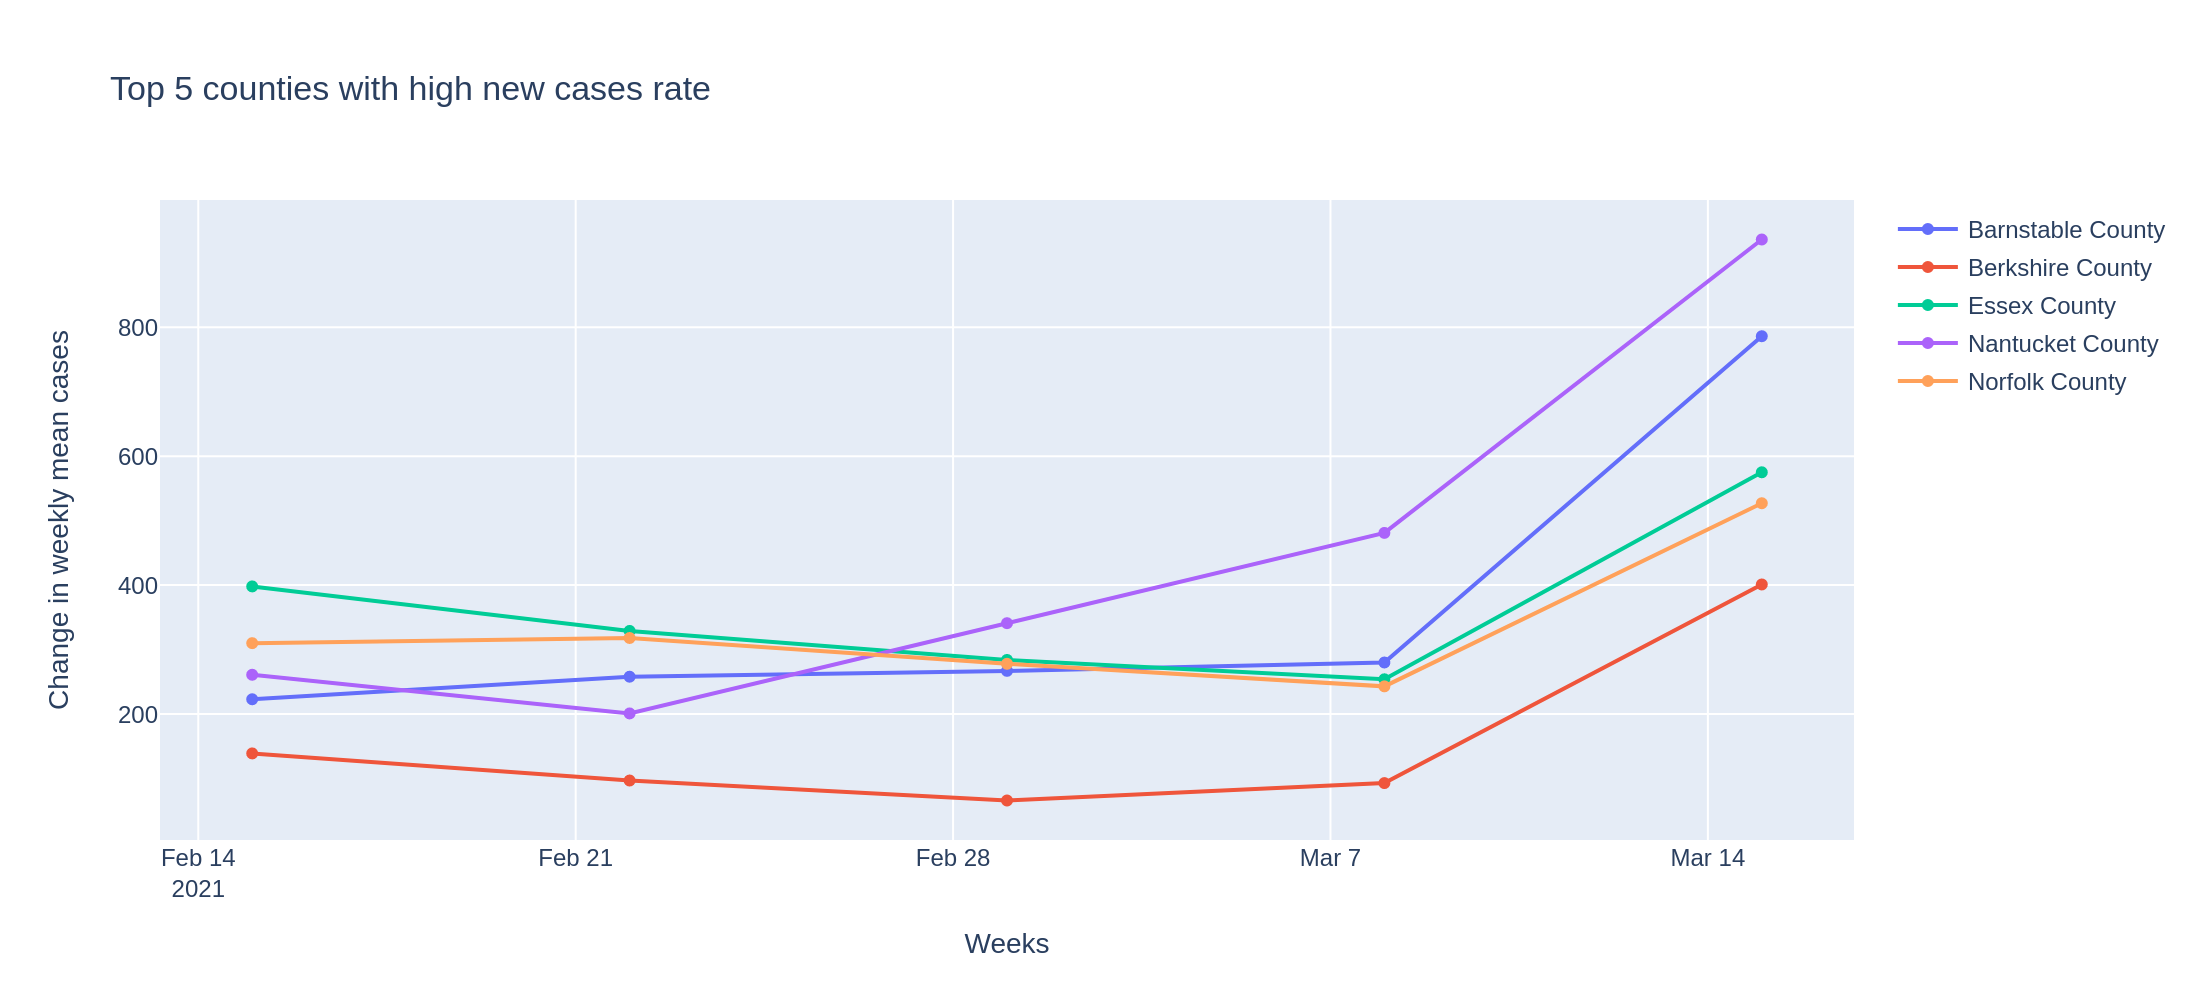

In [33]:
fig = go.Figure()
temp = pd.DataFrame(weekly_cases.iloc[-5:].unstack())
temp.reset_index(inplace=True)
temp.columns = ['countyFIPS', 'date', 'new_cases']
temp = temp.merge(state_data[['countyFIPS', 'County Name']])
temp = temp[['countyFIPS', 'County Name','date', 'new_cases']]
for i in list(counties.to_dict()['countyFIPS'].values()):
    local = temp[temp.countyFIPS  == i]
    fig.add_trace(go.Scatter(x=local.date, y=local.new_cases, mode='lines+markers', name="".join(local['County Name'].unique())))
fig.update_layout(
    title="Top 5 counties with high new cases rate",
    xaxis_title="Weeks",
    yaxis_title="Change in weekly mean cases",
    height=500,
)
# fig.show()
img_bytes = fig.to_image(format="png", width=1100, height=500, scale=2)
Image(img_bytes)

### Counties with higher death rate

In [34]:
temp = weekly_deaths.iloc[-2:].diff().sort_values('2021-03-15', axis=1, ascending=False).iloc[-1:,:5]
counties = state_data[state_data.countyFIPS.isin(temp.columns)][['countyFIPS','County Name']]
counties

,countyFIPS,County Name
1239,25003,Berkshire County
1243,25011,Franklin County
1244,25013,Hampden County
1249,25023,Plymouth County
1251,25027,Worcester County


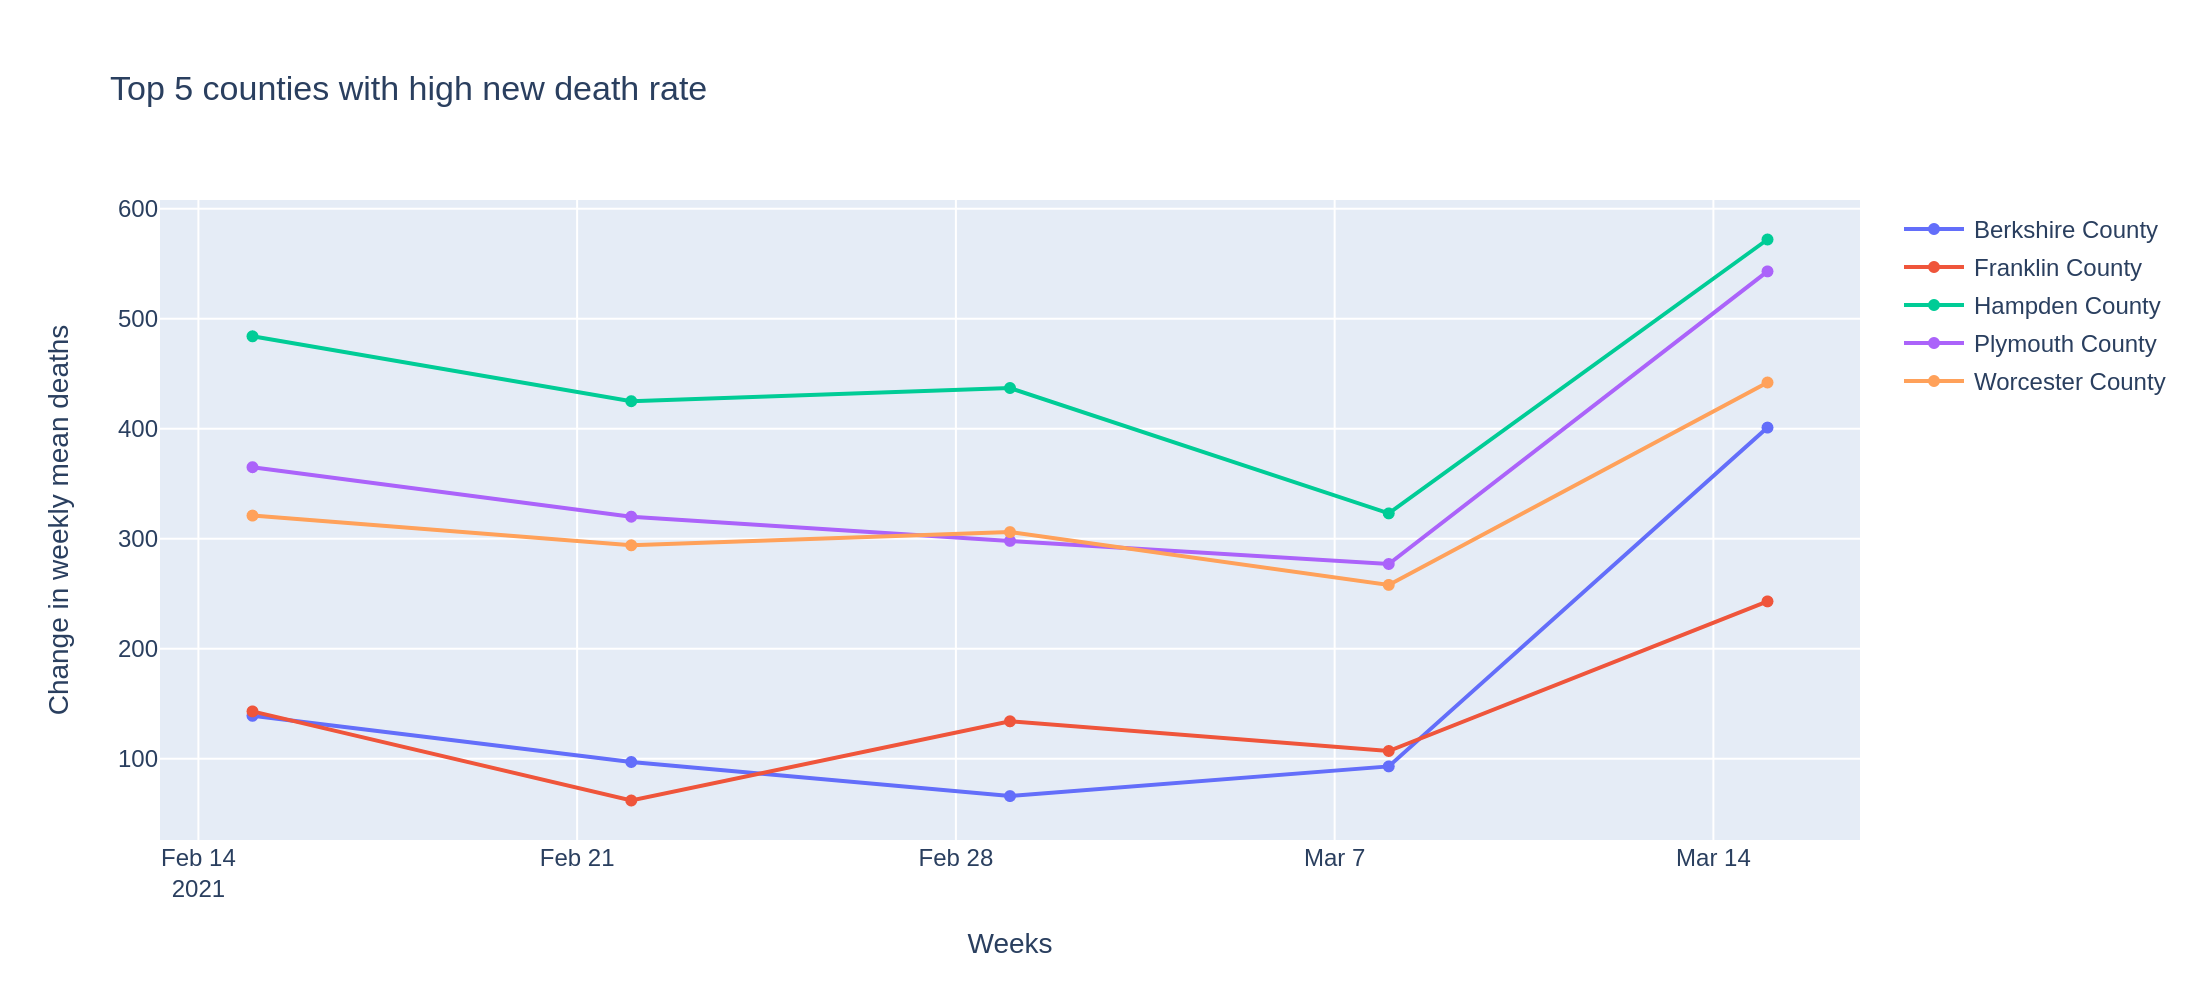

In [35]:
fig = go.Figure()
temp = pd.DataFrame(weekly_cases.iloc[-5:].unstack())
temp.reset_index(inplace=True)
temp.columns = ['countyFIPS', 'date', 'new_cases']
temp = temp.merge(state_data[['countyFIPS', 'County Name']])
temp = temp[['countyFIPS', 'County Name','date', 'new_cases']]
for i in list(counties.to_dict()['countyFIPS'].values()):
    local = temp[temp.countyFIPS  == i]
    fig.add_trace(go.Scatter(x=local.date, y=local.new_cases, mode='lines+markers', name="".join(local['County Name'].unique())))
fig.update_layout(
    title="Top 5 counties with high new death rate",
    xaxis_title="Weeks",
    yaxis_title="Change in weekly mean deaths",
    height=500,
)
# fig.show()
img_bytes = fig.to_image(format="png", width=1100, height=500, scale=2)
Image(img_bytes)

<div class="alert-success">
    <h2 style="text-align:center;"><br/><strong>Find top 5 infected counties</strong><br/><br/></h2>
</div>

To quickly get the top 5 infected counties, we can use the normalized dataframe and get the sum across each county. The counties with the largest sum are the top infected counties.

In [36]:
top_inf = weekly_cases.sum().sort_values(ascending=False)[:5].index
counties = state_data[state_data.countyFIPS.isin(top_inf)][['countyFIPS','County Name']]
counties

,countyFIPS,County Name
1240,25005,Bristol County
1242,25009,Essex County
1244,25013,Hampden County
1247,25019,Nantucket County
1250,25025,Suffolk County


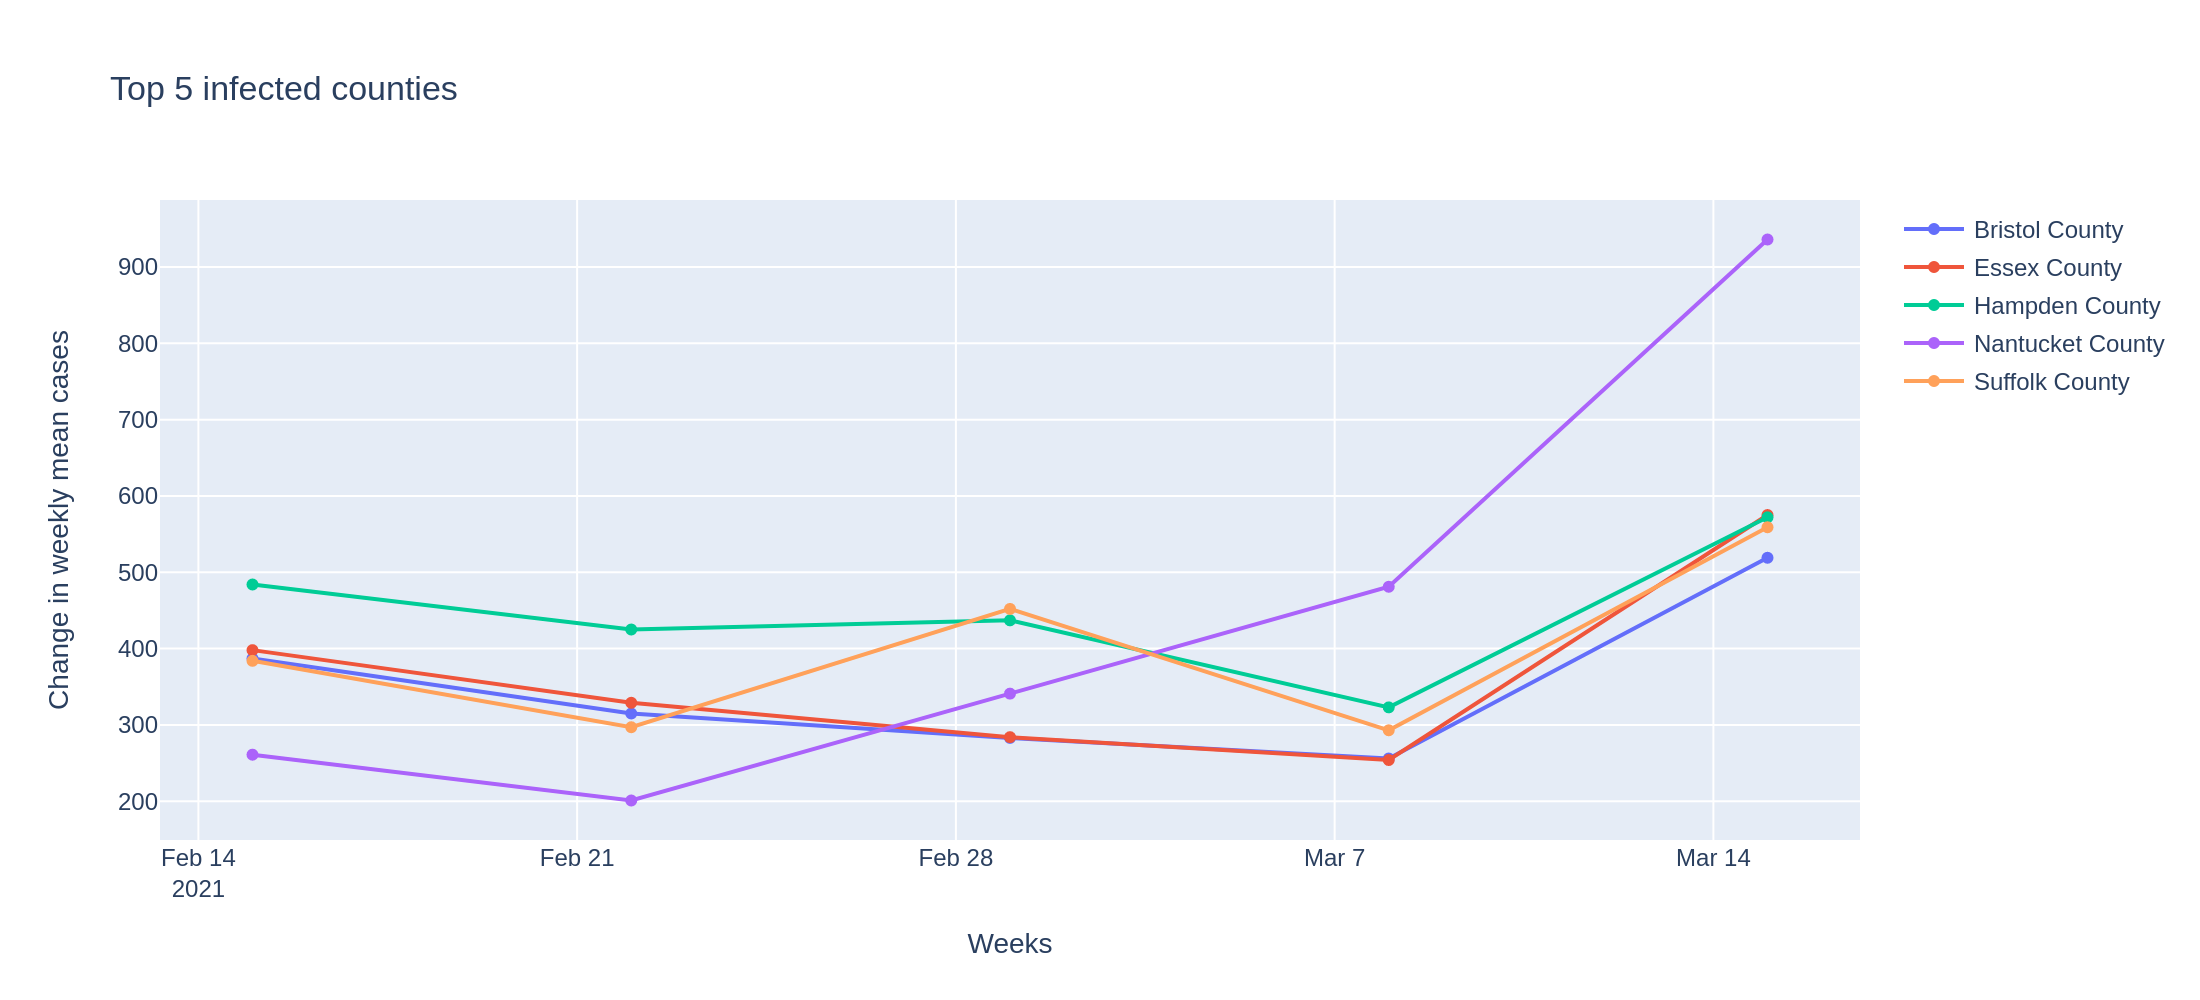

In [37]:
fig = go.Figure()
temp = pd.DataFrame(weekly_cases.iloc[-5:].unstack())
temp.reset_index(inplace=True)
temp.columns = ['countyFIPS', 'date', 'new_cases']
temp = temp.merge(state_data[['countyFIPS', 'County Name']])
temp = temp[['countyFIPS', 'County Name','date', 'new_cases']]
for i in list(counties.to_dict()['County Name'].values()):
    local = temp[temp['County Name'] == i]
    fig.add_trace(go.Scatter(x=local.date, y=local.new_cases, mode='lines+markers', name=i))
fig.update_layout(
    title="Top 5 infected counties",
    xaxis_title="Weeks",
    yaxis_title="Change in weekly mean cases",
    height=500,
)
# fig.show()
img_bytes = fig.to_image(format="png", width=1100, height=500, scale=2)
Image(img_bytes)

In [38]:
test = np.log(weekly_cases).astype('str').replace('-inf', 0).astype('float')
test

countyFIPS,25001,25003,25005,25007,25009,25011,25013,25015,25017,25019,25021,25023,25025,25027
date,,,,,,,,,,,,,,
2020-01-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-15,5.407172,4.934474,5.958425,5.525453,5.986452,4.962845,6.182085,6.218600,5.659482,5.564520,5.736572,5.899897,5.950643,5.771441
2021-02-22,5.552960,4.574711,5.752573,4.976734,5.796058,4.127134,6.052089,5.811141,5.556828,5.303305,5.762051,5.768321,5.693732,5.683580
2021-03-01,5.587249,4.189655,5.645447,5.288267,5.648974,4.897840,6.079933,5.926926,5.517453,5.831882,5.627621,5.697093,6.113682,5.723585


In [39]:
weekly_cases.loc['2020-08-10']

countyFIPS
25001     3
25003    -2
25005    21
25007     0
25009    24
25011     0
25013    18
25015    14
25017    21
25019     0
25021    22
25023    19
25025    48
25027    15
Name: 2020-08-10, dtype: int64

In [40]:
total_state_cases[total_state_cases.isnull().any(axis=1)]

,total,year,week


In [41]:
test[(test == 0).any(axis=1)]

countyFIPS,25001,25003,25005,25007,25009,25011,25013,25015,25017,25019,25021,25023,25025,25027
date,,,,,,,,,,,,,,
2020-01-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-03-02,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,0.000000
2020-03-09,0.000000,2.708050,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,2.302585,0.000000,2.079442,0.000000,1.945910,0.693147
2020-03-16,3.218876,3.258097,2.197225,0.000000,2.772589,1.945910,1.791759,1.791759,2.890372,0.000000,2.639057,2.397895,3.295837,2.197225


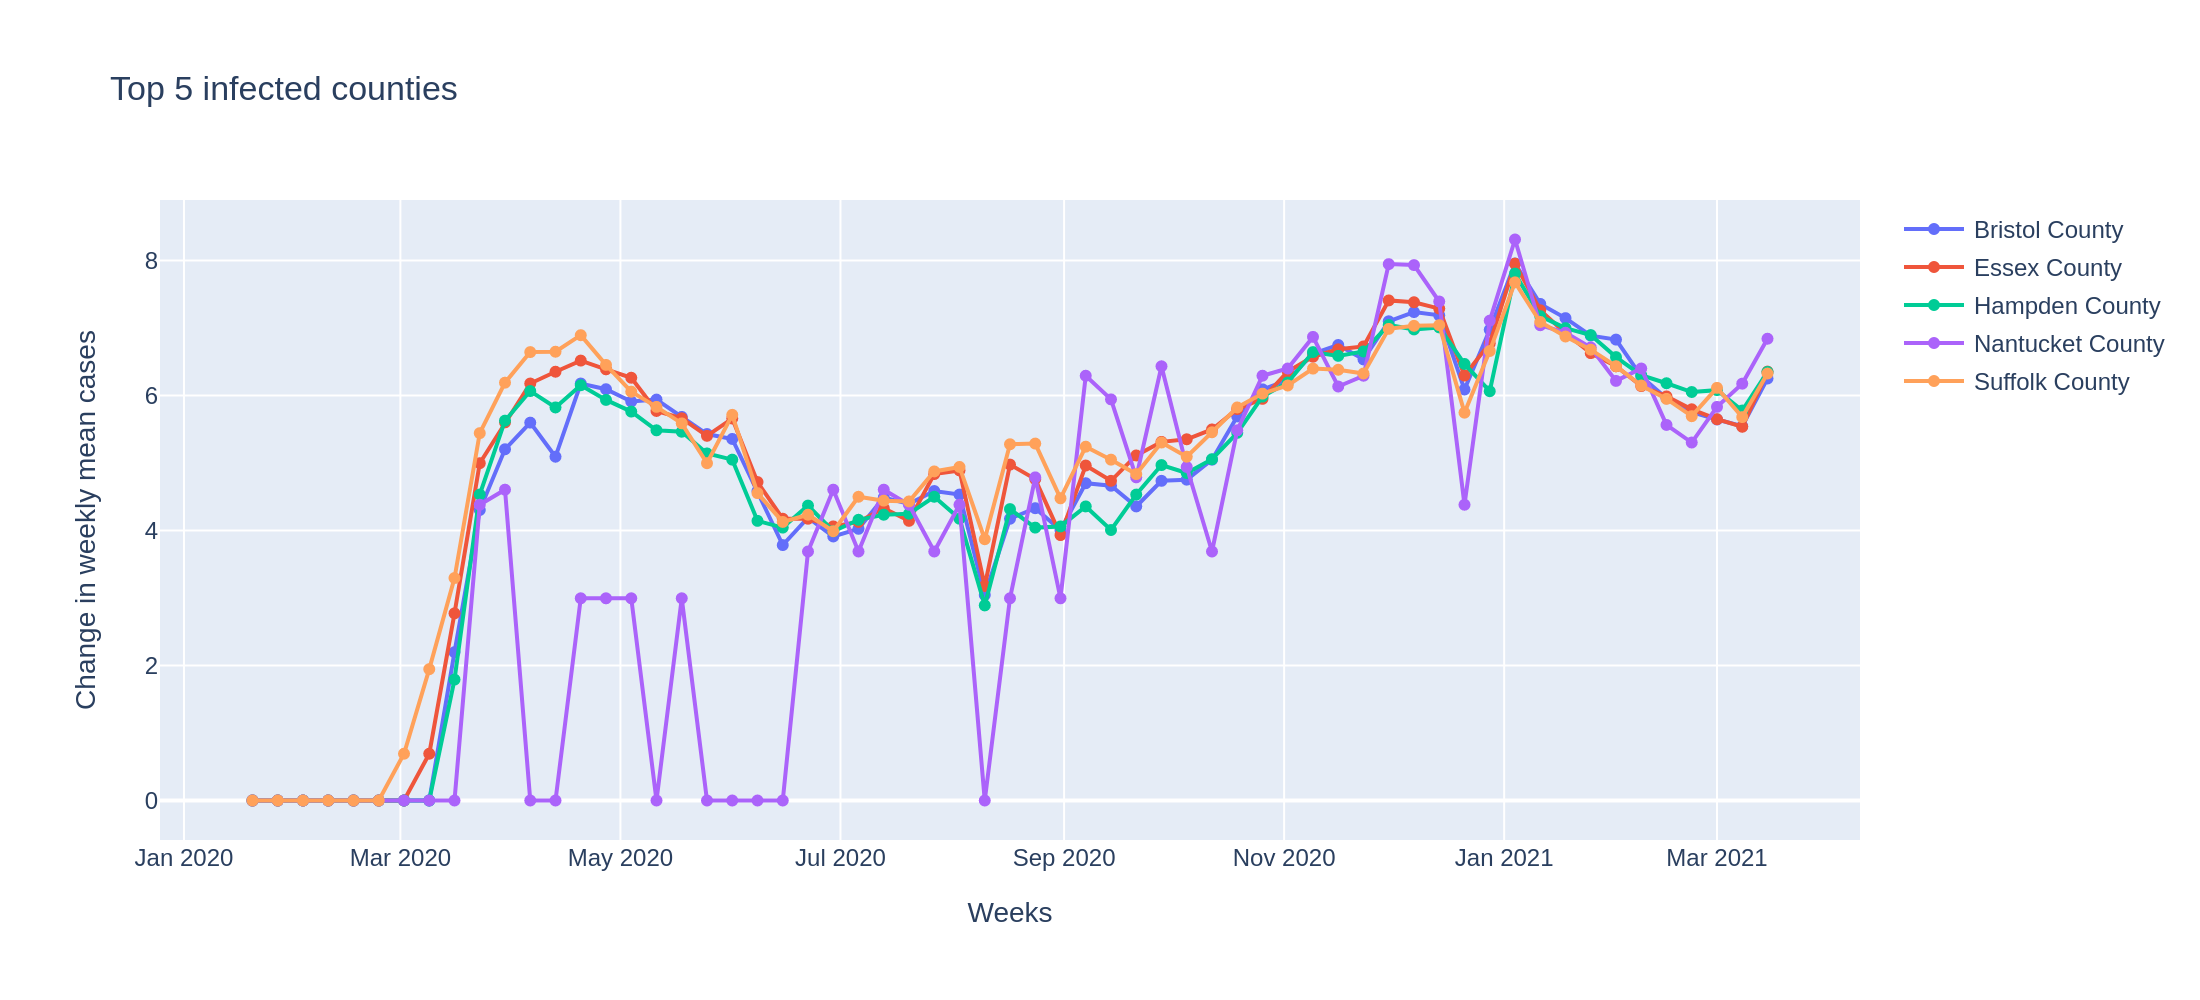

In [42]:
fig = go.Figure()
temp = pd.DataFrame(test.unstack())
temp.reset_index(inplace=True)
temp.columns = ['countyFIPS', 'date', 'new_cases']
temp = temp.merge(state_data[['countyFIPS', 'County Name']])
temp = temp[['countyFIPS', 'County Name','date', 'new_cases']]
for i in list(counties.to_dict()['County Name'].values()):
    local = temp[temp['County Name'] == i]
    fig.add_trace(go.Scatter(x=local.date, y=local.new_cases, mode='lines+markers', name=i))
fig.update_layout(
    title="Top 5 infected counties",
    xaxis_title="Weeks",
    yaxis_title="Change in weekly mean cases",
    height=500,
)
# fig.show()
img_bytes = fig.to_image(format="png", width=1100, height=500, scale=2)
Image(img_bytes)